In [5]:
import numpy as np
from sklearn.cluster import AffinityPropagation
import tsne

In [6]:
X = np.loadtxt("cikm_training_scores.csv")
labels = np.genfromtxt("cikm_training_words.csv", dtype=str)

In [7]:
indices = np.random.random_integers(0,len(labels) - 1,3000)
X_sub = X[indices]
labels_sub = labels[indices]

In [8]:
Y_tsne = tsne.tsne(X_sub, 2, 50, 20.0)

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point  0  of  3000 ...
Computing P-values for point  500  of  3000 ...
Computing P-values for point  1000  of  3000 ...
Computing P-values for point  1500  of  3000 ...
Computing P-values for point  2000  of  3000 ...
Computing P-values for point  2500  of  3000 ...
Mean value of sigma:  2.58229304791
Iteration  10 : error is  18.5254911033
Iteration  20 : error is  18.4332910537
Iteration  30 : error is  18.3681424283
Iteration  40 : error is  18.4796419465
Iteration  50 : error is  18.6941376667
Iteration  60 : error is  18.9405613468
Iteration  70 : error is  19.1185041053
Iteration  80 : error is  19.008679299
Iteration  90 : error is  19.2755229023
Iteration  100 : error is  19.2415242604
Iteration  110 : error is  3.28663334364
Iteration  120 : error is  2.79949032321
Iteration  130 : error is  2.61772126532
Iteration  140 : error is  2.53592009053
Iteration  150 : error is  2.48219400227
I

In [62]:
y_sub = AffinityPropagation(damping=0.6).fit_predict(X_sub)

In [93]:
centroids_dict = {}
for i in range(len(y_sub)):
    #print(y_sub[i])
    if y_sub[i] in centroids_dict:
        centroids_dict[ y_sub[i] ] += 1
    else:
        centroids_dict[ y_sub[i] ] = 1

centroids = centroids_dict.values()        
#print centroids
# normalization
cmin = min(centroids)
cmax = max(centroids)
norm = cmax - cmin
#print(total)
colors = []
for k, v in centroids_dict.iteritems():
    c = v
    #c = (v - cmin) / float(norm)
    #print c
    colors.append( c )
    #print(str(k) + ": id = " + str(v) + "; c = " + str(c))

colors_ordered = []    
for i in range(len(y_sub)):
    c = colors[y_sub[i]]
    #print( str(y_sub[i]) + ": " + str(c))
    colors_ordered.append(c)
#print colors_ordered

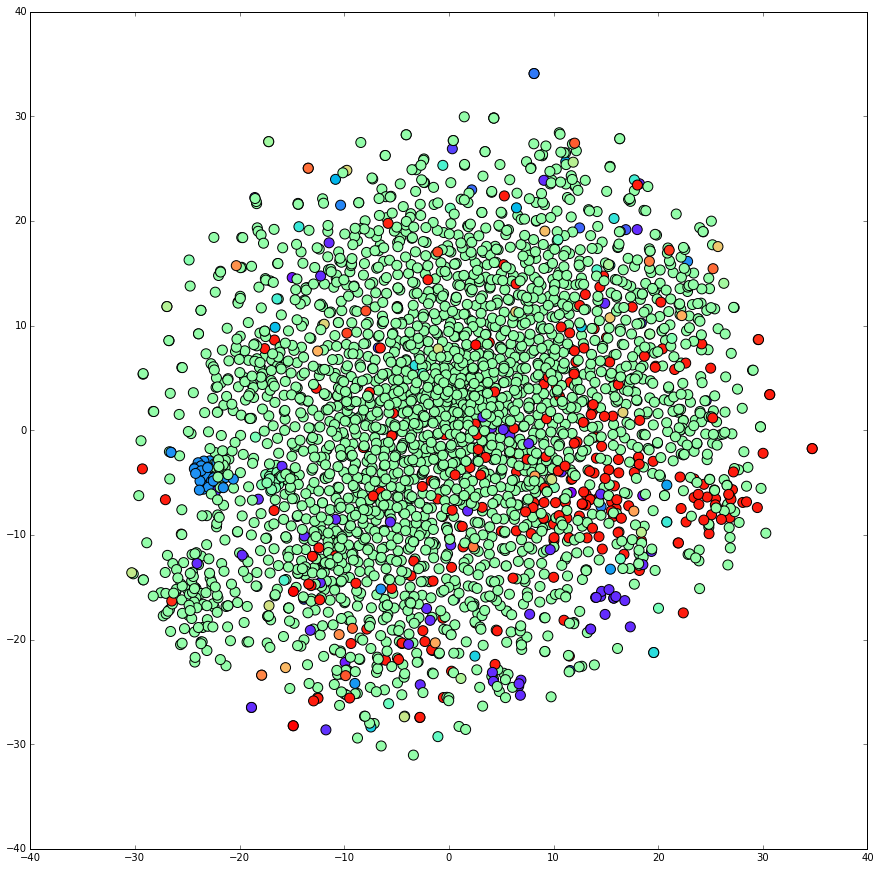

In [94]:
#plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
cmin = min(y_sub)
cmax = max(y_sub)
cnorm = mpl.colors.Normalize(vmin=cmin,vmax=cmax)

plt.figure(figsize=(15, 15))
# only turn off after checking the axis min/max
#plt.axis('off')
plt.scatter(Y_tsne[:,0], Y_tsne[:,1], s=100, c=y_sub, cmap=plt.cm.get_cmap('rainbow'), norm=cnorm, alpha=1.0)

#for i in range(len(Y_tsne[:,0])):
#    plt.annotate(labels_sub[i], (Y_tsne[i,0], Y_tsne[i,1]))

#plt.savefig('tsne_annotated.png',bbox_inches='tight')
plt.savefig('tsne_colors.png',bbox_inches='tight')

In [95]:
for k, v in centroids_dict.iteritems(): print str(k) + ": " + str(v) 

0: 1
1: 1
2: 1
3: 1
4: 1
5: 1
6: 57
7: 1
8: 1
9: 1
10: 1
11: 1
12: 1
13: 1
14: 1
15: 1
16: 1
17: 2
18: 1
19: 1
20: 1
21: 31
22: 1
23: 1
24: 1
25: 1
26: 1
27: 1
28: 1
29: 1
30: 1
31: 1
32: 1
33: 1
34: 1
35: 1
36: 2
37: 1
38: 1
39: 1
40: 2
41: 1
42: 1
43: 1
44: 1
45: 1
46: 1
47: 1
48: 1
49: 1
50: 1
51: 1
52: 2
53: 1
54: 1
55: 22
56: 1
57: 1
58: 2556
59: 2
60: 1
61: 2
62: 1
63: 1
64: 1
65: 2
66: 1
67: 1
68: 1
69: 1
70: 1
71: 1
72: 1
73: 1
74: 1
75: 1
76: 1
77: 1
78: 1
79: 1
80: 1
81: 1
82: 1
83: 1
84: 1
85: 1
86: 1
87: 1
88: 1
89: 2
90: 1
91: 1
92: 2
93: 1
94: 1
95: 1
96: 1
97: 1
98: 1
99: 1
100: 1
101: 1
102: 1
103: 1
104: 220
105: 1
106: 1
107: 1
108: 2
